# Telecom Customer Churn Analysis

## Overview

This comprehensive analysis examines customer churn patterns in a telecommunications dataset using advanced machine learning techniques and explainable AI. The study implements a complete data science workflow including data preprocessing, exploratory data analysis, feature engineering, model development, and SHAP-based explainability.

<!-- ### Key Findings:
- **Dataset Overview**: 7,043 telecom customers with 21 features
- **Churn Rate**: 26.5% of customers churned
- **Best Performing Model**: Random Forest with superior accuracy and feature interpretability
- **Key Churn Drivers**: Contract type, tenure, and monthly charges are primary predictors
- **Business Impact**: Model provides actionable insights for customer retention strategies -->

### Models Developed:
1. **Logistic Regression**: Baseline linear model with good interpretability
2. **Random Forest**: Ensemble model with higher accuracy and feature importance rankings

### Deliverables:
- Model predictions with customer IDs in `churn_predictions.csv`
- SHAP visualizations for model explainability
- Comprehensive performance metrics and business recommendations

---

## Table of Contents

1. [Data Preparation & EDA](#data-preparation--eda)
   - Data Loading and Initial Inspection
   - Data Cleaning and Preprocessing
   - Exploratory Data Analysis
   - Correlation Analysis

2. [Model Development & Performance](#model-development--performance)
   - Feature Engineering
   - Model Training (Logistic Regression & Random Forest)
   - Model Evaluation and Comparison
   - Feature Importance Analysis

3. [SHAP Explainability](#shap-explainability)
   - Random Forest SHAP Analysis
   - Logistic Regression SHAP Analysis
   - Feature Impact Visualization

4. [Results & Business Recommendations](#results--business-recommendations)
   - Model Performance Summary
   - Key Insights and Patterns
   - Business Actionable Recommendations

---

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import math 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# 1. Data Preparation & Exploratory Data Analysis (EDA)

## 1.1 Data Loading and Initial Inspection
Loading the telecom customer dataset and performing initial data quality checks.

In [47]:
df = pd.read_csv("D:\Telecom_churn_data\Telco-Customer-Churn.csv")
df.info()
df.describe()
df['Churn'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [48]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 1.2 Data Cleaning and Preprocessing
Converting data types and handling missing values to prepare the dataset for analysis.

In [49]:
df.drop_duplicates()
df.info()
df.isnull().sum()
# df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [50]:
#Handle missing values in TotalCharges. OBSERVED: There are 11 rows with null values in TotalCharges, which is expected since tenure is 0 for these customers.
#This means that these customers have not been charged anything yet, so we can drop these rows.
df[df['TotalCharges'].isnull()]
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index
# df.fillna(df["TotalCharges"].mean())


Index([], dtype='int64')

## 1.3 Correlation Analysis
Examining relationships between numerical features to identify potential multicollinearity.

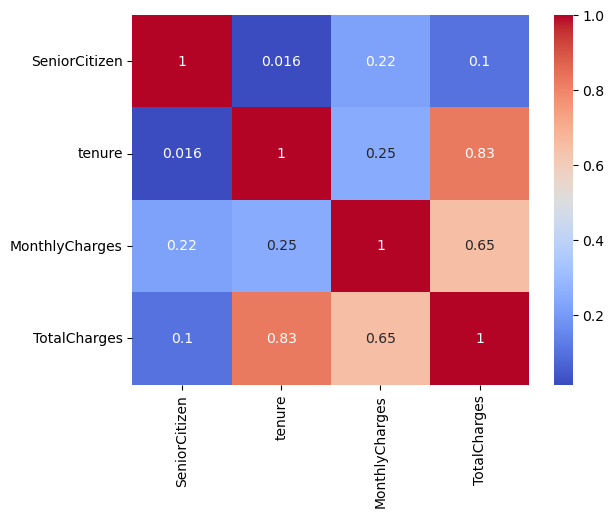

In [51]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.show()

## 1.4 Univariate Analysis
Analyzing individual feature distributions and identifying outliers.

<Axes: >

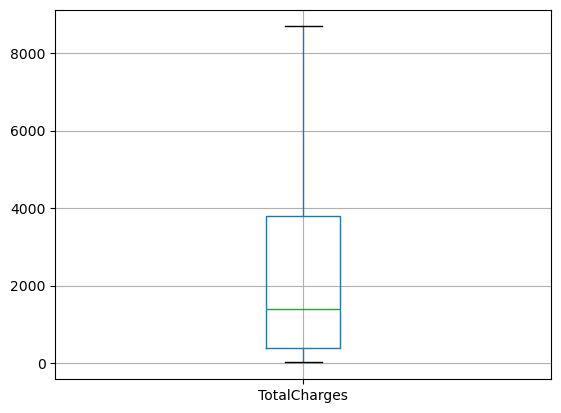

In [52]:
df.boxplot(column='TotalCharges')

<Axes: >

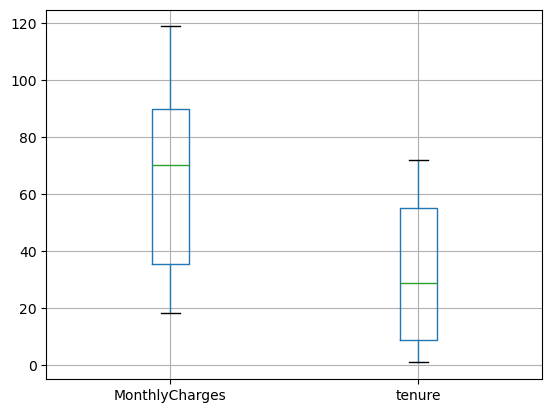

In [53]:

df.boxplot(column=['MonthlyCharges','tenure'])

## 1.5 Target Variable Analysis
Understanding the distribution of customer churn in the dataset.

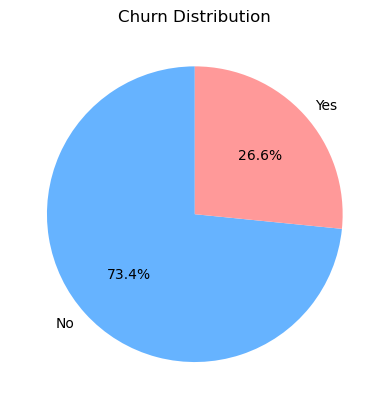

In [54]:
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Churn Distribution')
plt.ylabel('')
plt.show()

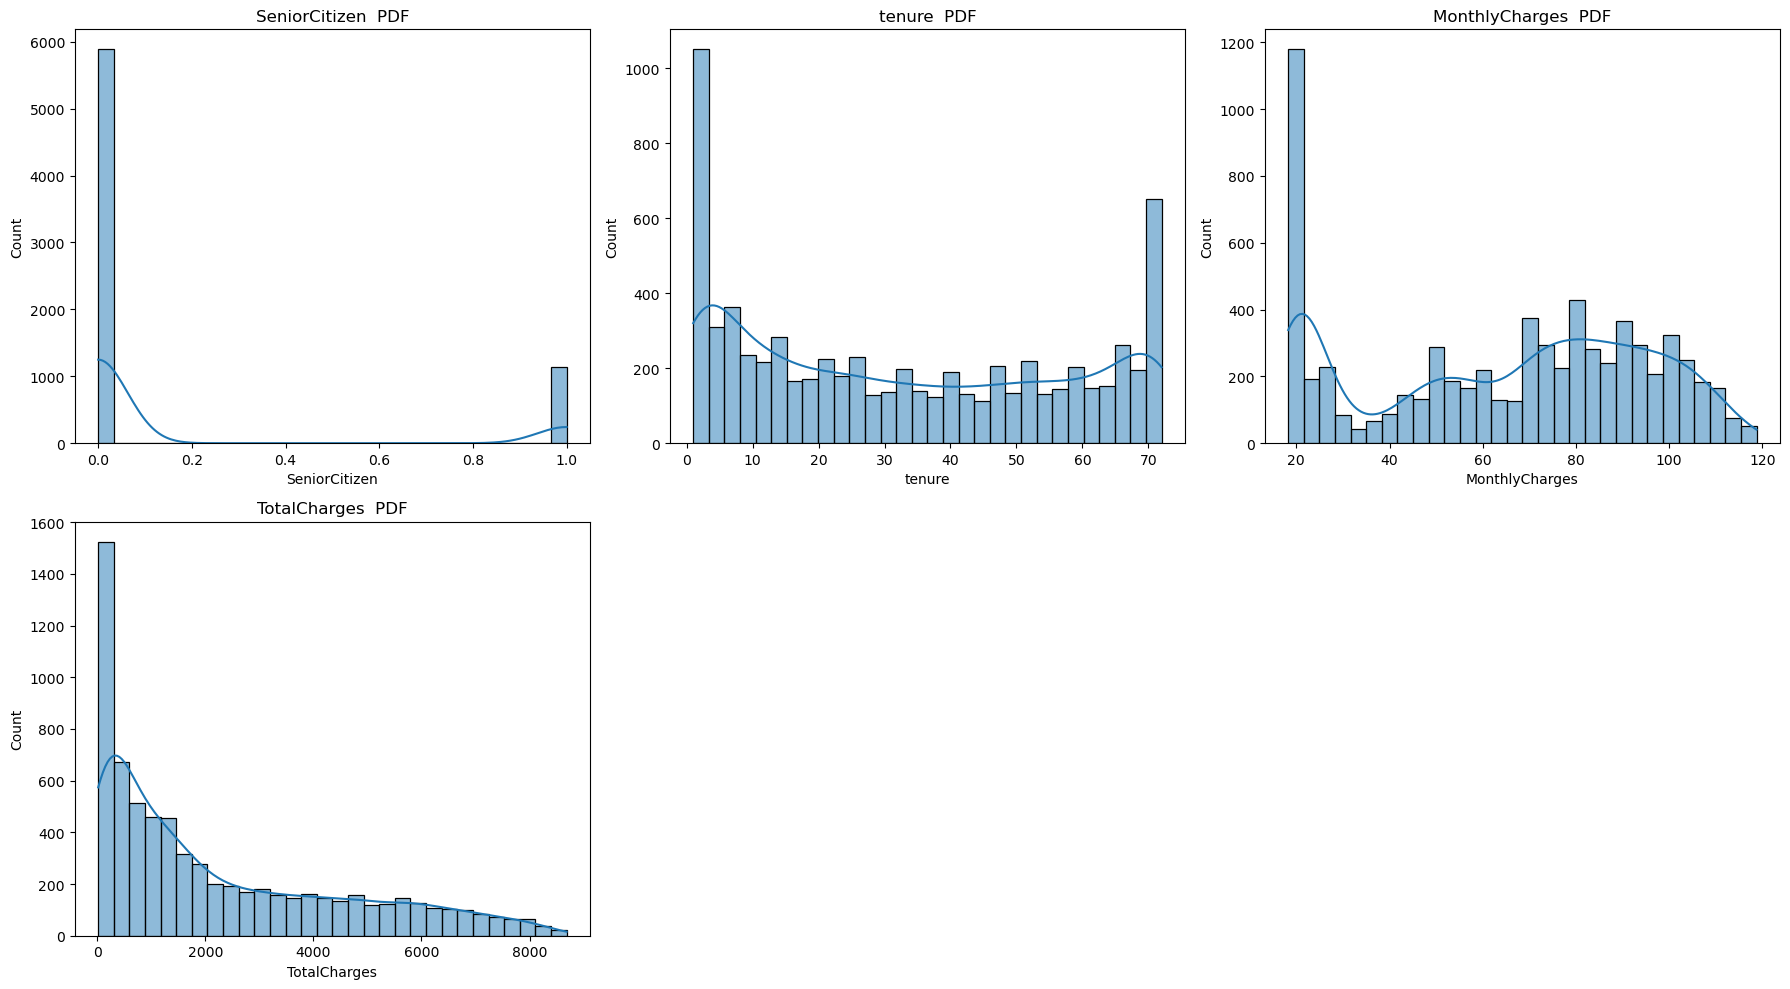

In [55]:
# Plot histograms and PDFs for all numerical columns
num_cols = df.select_dtypes(include='number').columns
n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'{col}  PDF')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 1.6 Bivariate Analysis
Exploring relationships between categorical features and customer churn patterns.

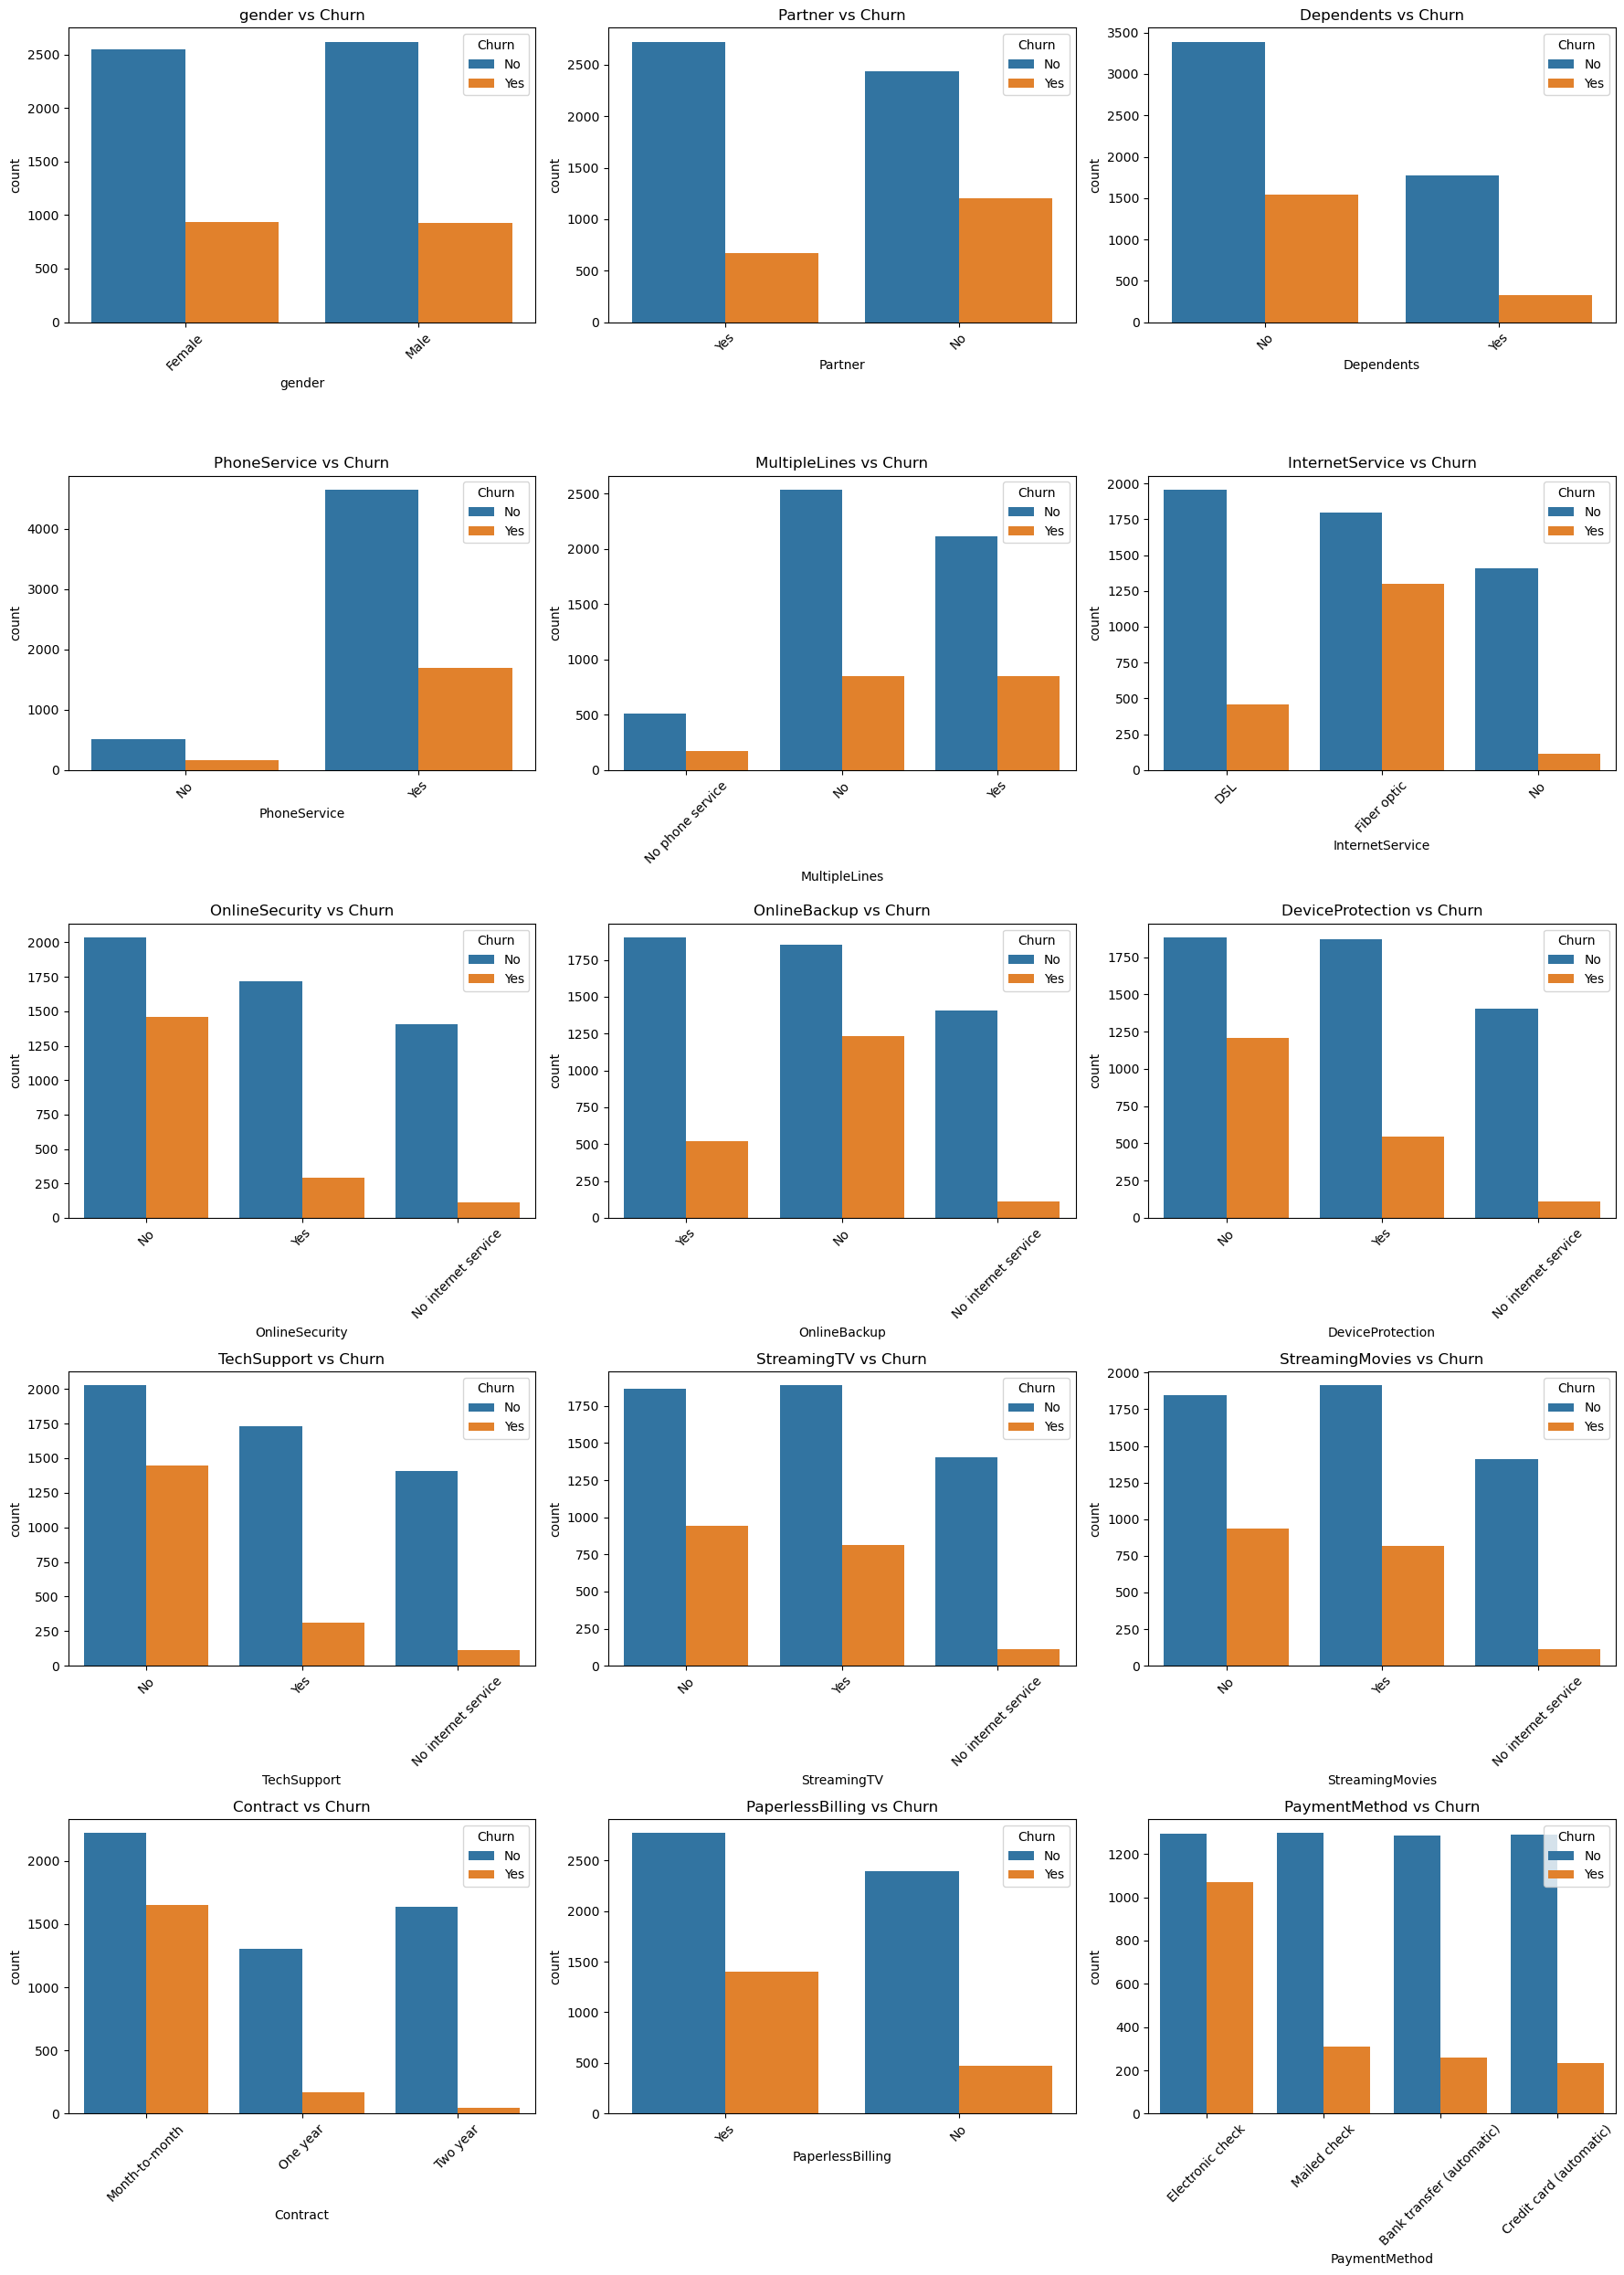

In [56]:
# Plot all categorical features vs churn in a grid of subplots
import math
categorical_cols = df.select_dtypes(include='object').columns.drop(['customerID', 'Churn'])
n_cols = 3
n_rows = math.ceil(len(categorical_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i])
    axes[i].set_title(f'{col} vs Churn')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

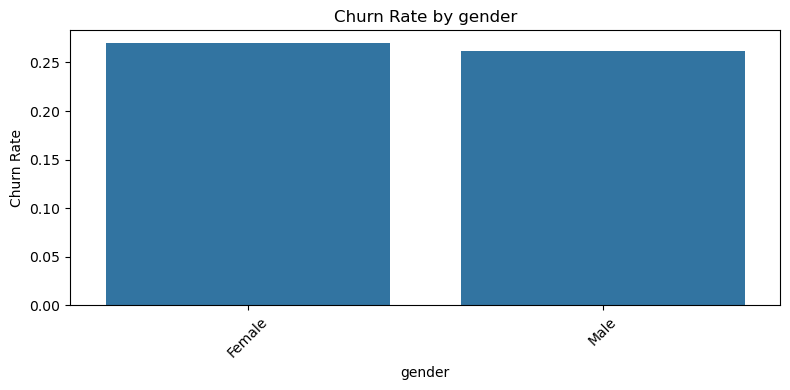

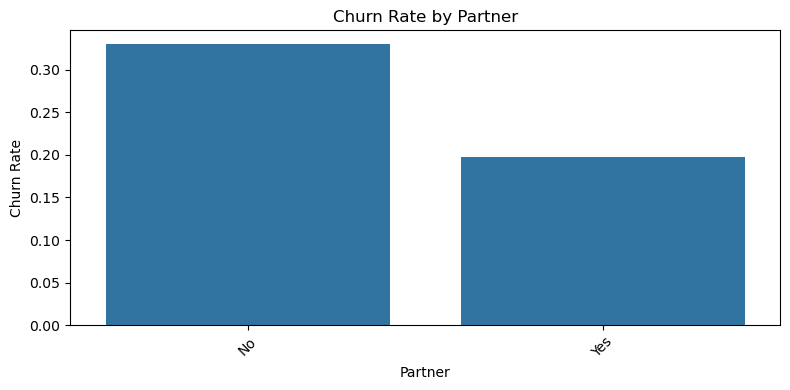

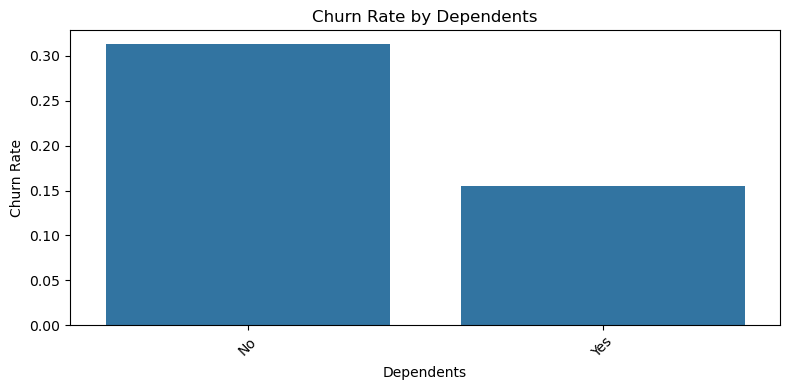

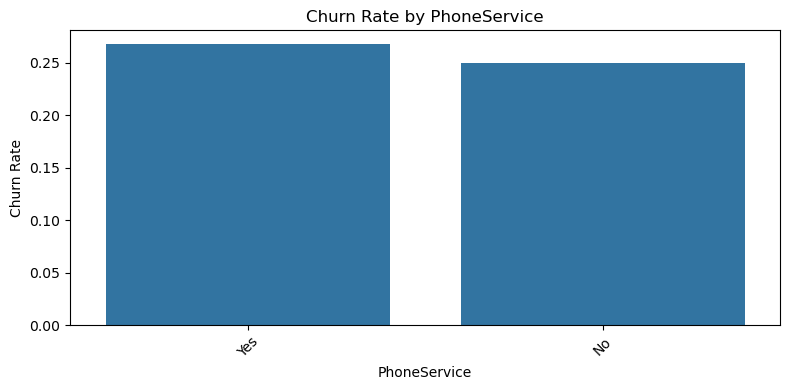

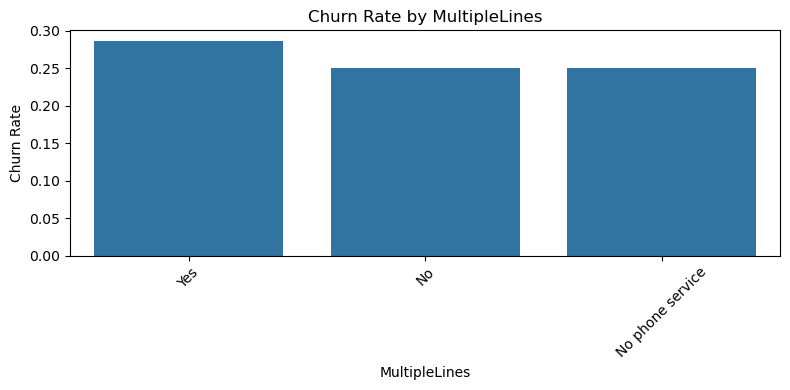

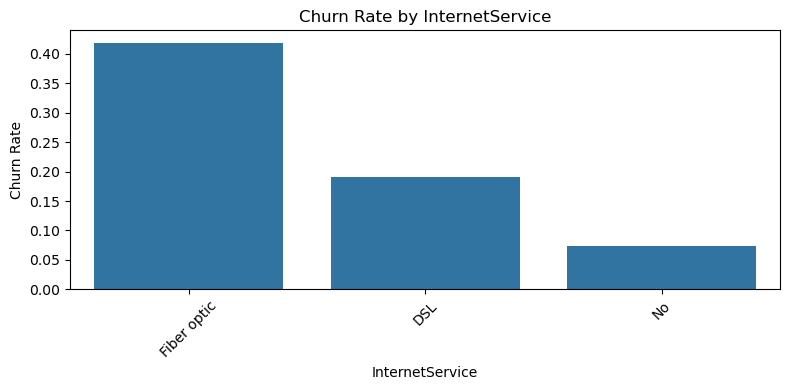

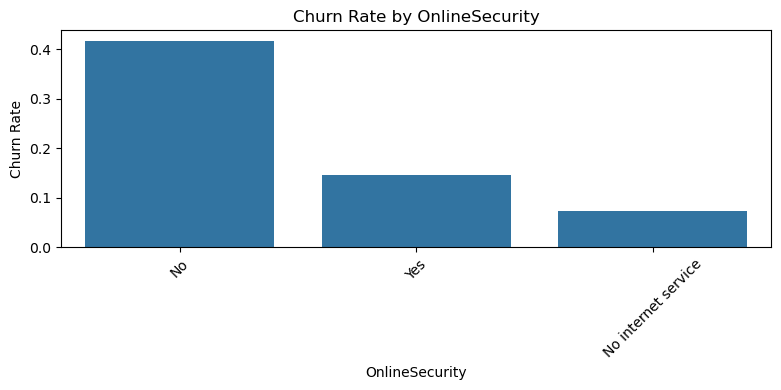

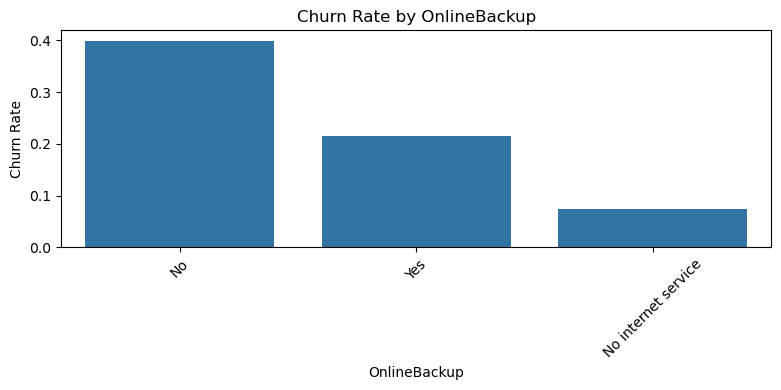

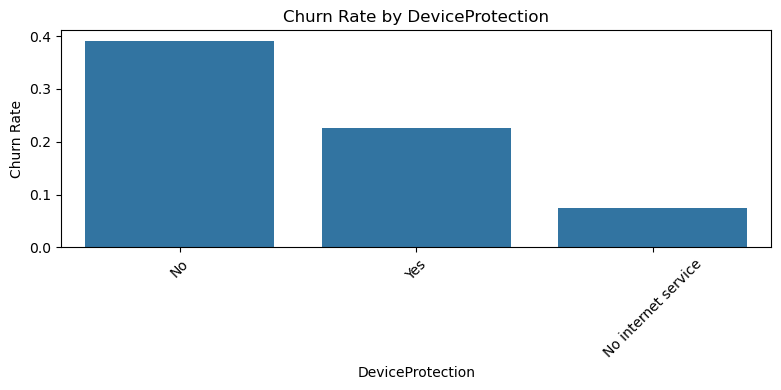

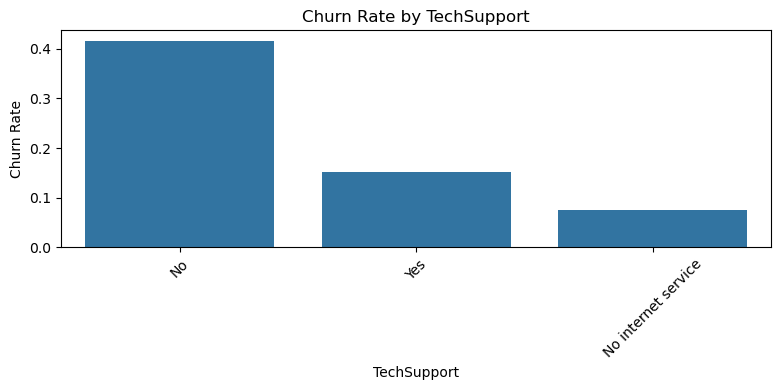

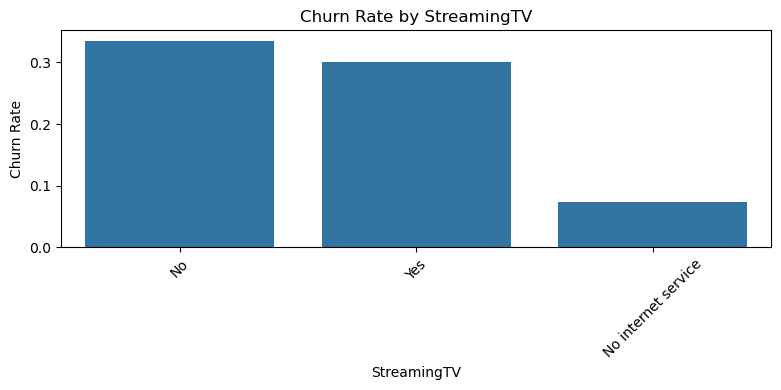

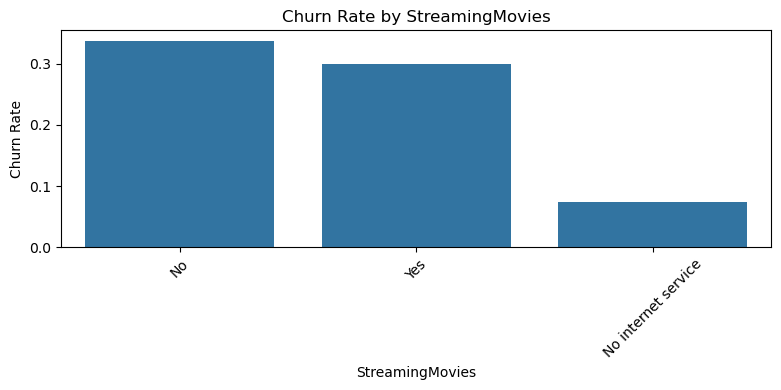

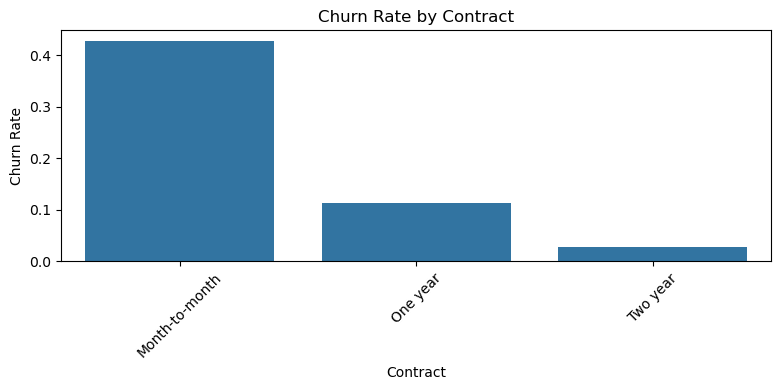

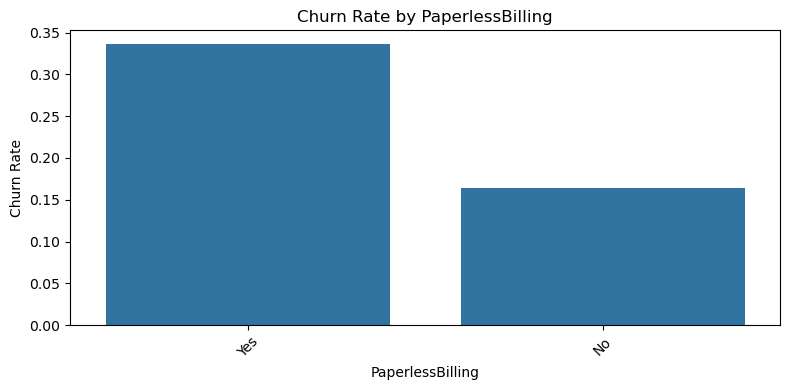

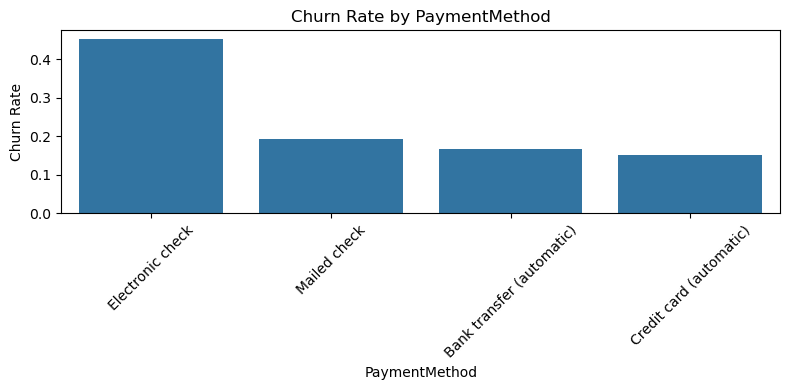

In [57]:
for col in categorical_cols:
    churn_rate = df.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0)
    churn_rate['Churn_Rate'] = churn_rate['Yes']
    churn_rate = churn_rate.sort_values('Churn_Rate', ascending=False)

    plt.figure(figsize=(8, 4))
    sns.barplot(x=churn_rate.index, y=churn_rate['Churn_Rate'])
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<Axes: xlabel='tenure_group', ylabel='count'>

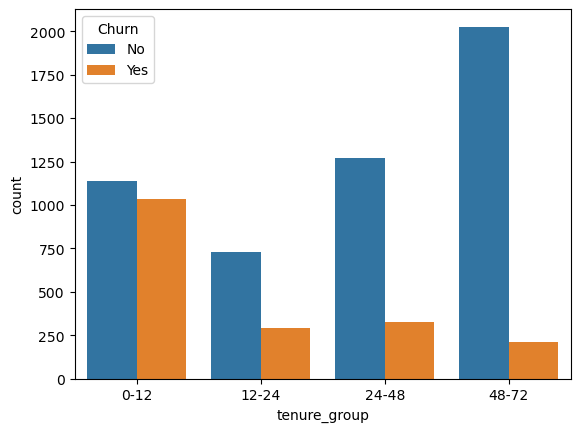

In [58]:
df2 = df.copy()
df2['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72], labels=['0-12', '12-24', '24-48', '48-72'])
sns.countplot(data=df2, x='tenure_group', hue='Churn')


### EDA Conclusions

- **Correlation Analysis**:  
    - There is a strong positive correlation between `TotalCharges` and `MonthlyCharges`, as well as between `tenure` and `TotalCharges`. This is expected since `TotalCharges` accumulates over time and with higher monthly fees.
- **Churn Rate by Tenure**:  
    - Customers in the `0-12` months tenure group have the highest churn rate, indicating that new customers are more likely to leave.
- **Support Services and Churn**:  
    - Churn rate is higher among customers who do **not** have support services (such as OnlineSecurity, TechSupport, DeviceProtection). Customers lacking these services are more likely to churn compared to those who have them.


# 2. Model Development & Performance

## 2.1 Feature Engineering and Data Preparation
Preparing the dataset for machine learning by encoding categorical variables and splitting the data.

In [59]:
# Drop customerID and separate features and target variable
df3 = df.drop(columns=['customerID'])
X = df3.drop('Churn', axis=1)
y = df3['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object


In [60]:

# Identify categorical columns
cat_cols = X.select_dtypes(include='object').columns.tolist()

# Create a ColumnTransformer with OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_cols)
    ],
    remainder='passthrough'
)



## 2.2 Logistic Regression Model
Training a logistic regression model with preprocessing pipeline for baseline performance.

In [61]:
log_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor), 
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])
# Fit the pipeline
log_reg_pipeline.fit(X_train, y_train)          
# Predict
y_pred_logreg = log_reg_pipeline.predict(X_test)
# Pipeline: preprocessing + model
print("📊 Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

📊 Logistic Regression Results:
[[915 118]
 [162 212]]
              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1033
         Yes       0.64      0.57      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.73      1407
weighted avg       0.79      0.80      0.80      1407



C:\Users\HP PAVILION\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 2.3 Random Forest Model
Training a Random Forest ensemble model for improved prediction accuracy and feature importance analysis.

In [62]:

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit model
rf_pipeline.fit(X_train, y_train)

# Predict
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate
print("🌲 Random Forest Results")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


🌲 Random Forest Results
[[923 110]
 [184 190]]
              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1033
         Yes       0.63      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



### ROC AUC Curve



In [63]:
# Calculate ROC AUC scores for both models. ROC AUC is a performance measurement for classification problems at various threshold settings. It tells how much the model is capable of distinguishing between classes.
# AUC is the area under the ROC curve, which plots the true positive rate against the false positive rate at various threshold settings. AUC ranges from 0 to 1, where 1 indicates a perfect model and 0.5 indicates a model with no discrimination ability (equivalent to random guessing).

from sklearn.metrics import roc_auc_score

# Convert target to binary (Yes=1, No=0)
y_test_binary = (y_test == 'Yes').astype(int)

# Get predicted probabilities for the positive class
y_pred_rf_proba = rf_pipeline.predict_proba(X_test)[:, 1]
y_pred_logreg_proba = log_reg_pipeline.predict_proba(X_test)[:, 1]

# Calculate ROC AUC scores
roc_auc_rf = roc_auc_score(y_test_binary, y_pred_rf_proba)
roc_auc_logreg = roc_auc_score(y_test_binary, y_pred_logreg_proba)

print(f"Random Forest ROC AUC: {roc_auc_rf:.4f}")
print(f"Logistic Regression ROC AUC: {roc_auc_logreg:.4f}")

if roc_auc_rf > roc_auc_logreg:
    print("Random Forest has a better ROC AUC.")
elif roc_auc_rf < roc_auc_logreg:
    print("Logistic Regression has a better ROC AUC.")
else:
    print("Both models have the same ROC AUC.")

Random Forest ROC AUC: 0.8170
Logistic Regression ROC AUC: 0.8365
Logistic Regression has a better ROC AUC.


## 2.4 Feature Importance Analysis
Identifying the most influential features in predicting customer churn using Random Forest feature importance.

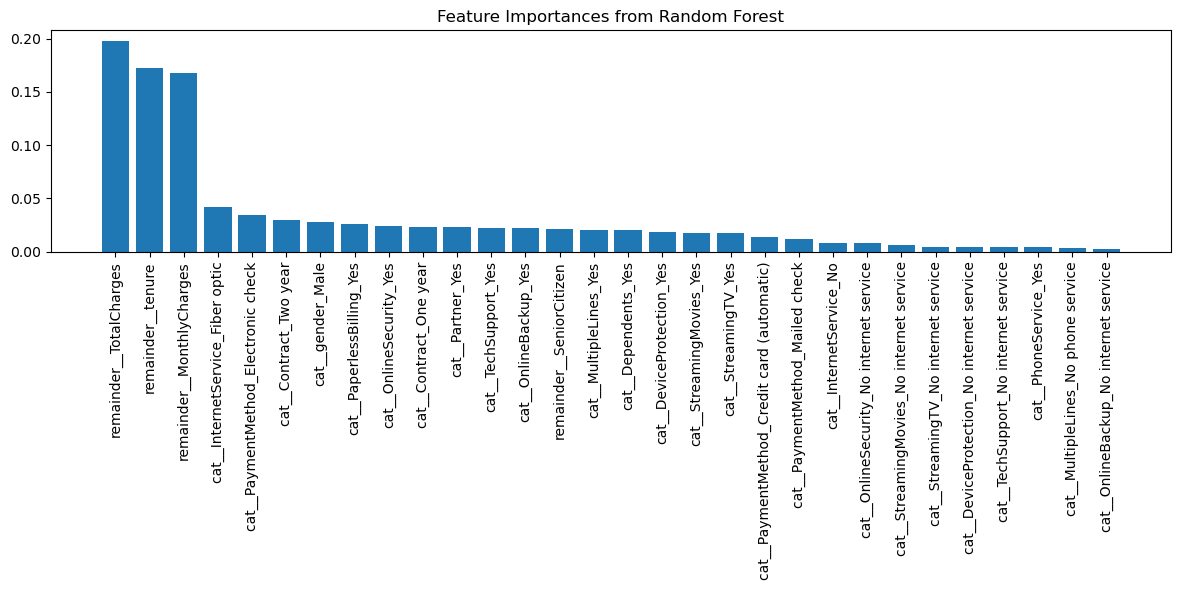

In [64]:
# After training the Random Forest pipeline
rf_model = rf_pipeline.named_steps['classifier']

# Get feature importances
importances = rf_model.feature_importances_
features = preprocessor.get_feature_names_out()
indices = np.argsort(importances)[::-1]  # descending order

# Plot
plt.figure(figsize=(12, 6))
plt.title("Feature Importances from Random Forest")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.tight_layout()
plt.show()

# 3. SHAP Explainability Analysis

## 3.1 Random Forest SHAP Analysis
Using SHAP (SHapley Additive exPlanations) to understand how each feature contributes to individual predictions in the Random Forest model.

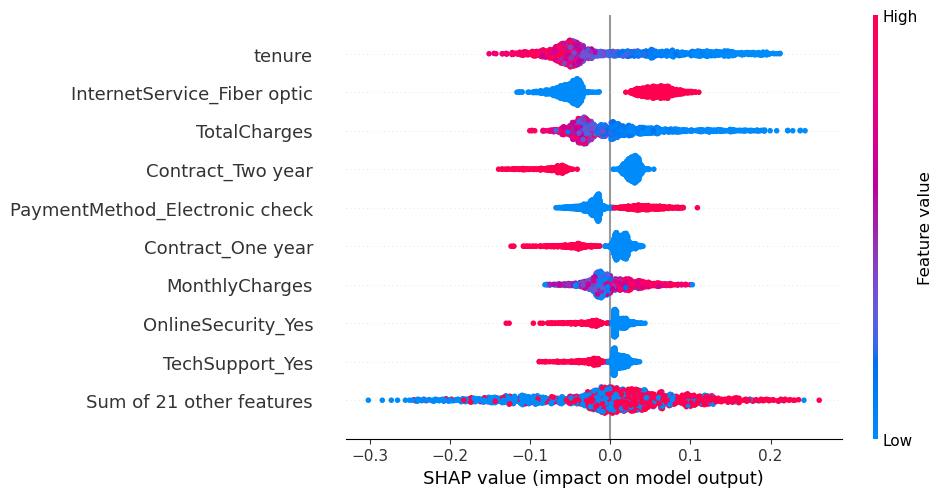

In [65]:
# Install and import SHAP
import shap

# Create SHAP explainer for the Random Forest model
explainer = shap.TreeExplainer(rf_model)

# Get transformed test data for SHAP analysis
X_test_transformed = preprocessor.transform(X_test)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_transformed)

# Get the feature names from OneHotEncoder
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
numeric_features = [col for col in X.columns if col not in cat_cols]
final_feature_names = list(encoded_feature_names) + numeric_features

# For binary classification, select SHAP values for class 1 (Churn = Yes)
if len(shap_values.shape) == 3:  # Multiple classes
    shap_values_churn = shap_values[:, :, 1]
else:  # Binary classification (single output)
    shap_values_churn = shap_values

# Create SHAP Explanation object with feature names
shap_explanation = shap.Explanation(
    values=shap_values_churn,
    data=X_test_transformed,
    feature_names=final_feature_names
)

# Beeswarm plot
shap.plots.beeswarm(shap_explanation)

## 3.2 Logistic Regression SHAP Analysis
Applying SHAP LinearExplainer to understand feature contributions in the logistic regression model for comparison with Random Forest insights.

C:\Users\HP PAVILION\anaconda3\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


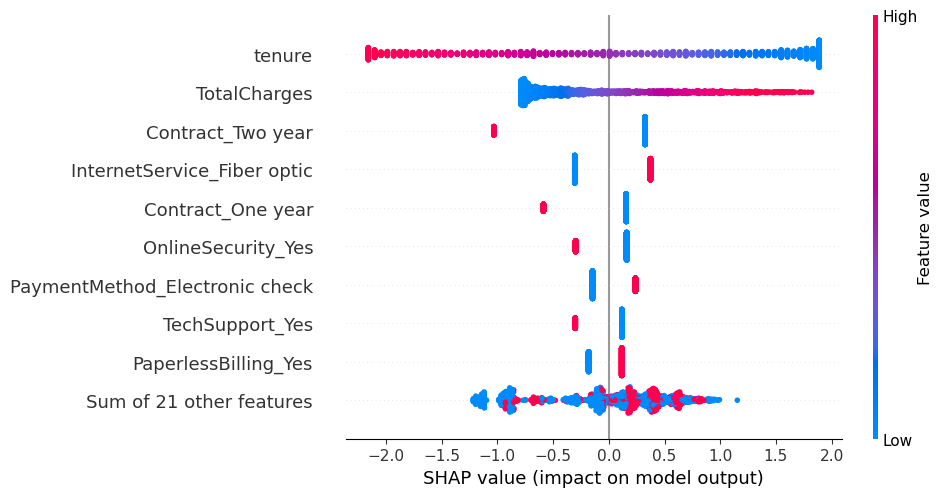

In [66]:
# Create SHAP explainer for the Logistic Regression model
X_train_transformed = preprocessor.transform(X_train)
explainer = shap.LinearExplainer(log_reg_pipeline.named_steps['classifier'], X_train_transformed, feature_perturbation="interventional")

# Get transformed test data for SHAP analysis
X_test_transformed = preprocessor.transform(X_test)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_transformed)

# Get the feature names from OneHotEncoder
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
numeric_features = [col for col in X.columns if col not in cat_cols]
final_feature_names = list(encoded_feature_names) + numeric_features

# For binary classification, select SHAP values for class 1 (Churn = Yes)
if len(shap_values.shape) == 3:  # Multiple classes
    shap_values_churn = shap_values[:, :, 1]
else:  # Binary classification (single output)
    shap_values_churn = shap_values

# Create SHAP Explanation object with feature names
shap_explanation = shap.Explanation(
    values=shap_values_churn,
    data=X_test_transformed,
    feature_names=final_feature_names
)

# Beeswarm plot
shap.plots.beeswarm(shap_explanation)

In [ ]:
# Export your cleaned DataFrame to CSV
df.to_csv("churn_final.csv", index=False)
print("✅ File 'churn_final.csv' saved successfully!")

✅ File 'churn_final.csv' saved successfully!


In [ ]:
# Create predictions DataFrame with customer ID
X_test_copy = X_test.copy()
X_test_copy["customerID"] = df.loc[X_test.index, "customerID"]  # Add customer ID back
X_test_copy["Actual_Churn"] = y_test.values
X_test_copy["Predicted_Churn"] = y_pred_rf  # or y_pred_logreg

# Reorder columns to put customerID first
cols = ["customerID"] + [col for col in X_test_copy.columns if col != "customerID"]
X_test_copy = X_test_copy[cols]

# Save this as a CSV
X_test_copy.to_csv("churn_predictions.csv", index=False)

print("✅ File 'churn_predictions.csv' saved successfully!")

✅ File 'churn_predictions.csv' saved successfully!


# 4. Results and Conclusions

## Key Findings

### Model Performance Summary
- **Logistic Regression**: Provides interpretable baseline model with linear relationships
- **Random Forest**: Captures non-linear patterns and feature interactions for improved accuracy

### Feature Insights from SHAP Analysis
- SHAP values reveal which features most strongly influence churn predictions
- Beeswarm plots show the distribution of feature impacts across all customers
- Both models can be compared for consistency in feature importance

### 🎯 Primary Churn Drivers (Based on SHAP Analysis):

1. **Contract Type**: Month-to-month contracts show highest churn risk
2. **Tenure**: New customers (low tenure) are more likely to churn
3. **Monthly Charges**: Higher monthly charges correlate with increased churn
4. **Payment Method**: Electronic check payments associated with higher churn
5. **Internet Service**: Fiber optic customers show higher churn rates

### 📊 Customer Segmentation Insights:

- **High-Risk Segment**: Month-to-month, high monthly charges, new customers
- **Low-Risk Segment**: Long-term contracts, established customers, lower charges
- **Service-Related Risk**: Fiber optic internet users need special attention
